In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("Dataset\\fact_survey_responses.csv")
df2 = pd.read_csv("Dataset\\dim_repondents.csv")
df3 = pd.merge(df1,df2,on="Respondent_ID")
df3.to_csv("Dataset\\data.csv", index=False)
df3

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late,Arnav Kale,31-45,Male,CT112
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties,Yuvraj Agrawal,15-18,Male,CT113
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise,Vardaniya Chauhan,31-45,Male,CT114
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late,Jayan Goyal,19-30,Male,CT113


In [63]:
# Question1 Who prefers energy drink more? (male/female/non-binary)?

In [6]:
df11 = df3.loc[:,['Consume_frequency','Gender']]
df12 = df11.groupby('Consume_frequency').get_group('Daily')
df12

,Consume_frequency,Gender
4,Daily,Female
15,Daily,Male
18,Daily,Female
19,Daily,Female
23,Daily,Male
...,...,...
9993,Daily,Non-binary
9995,Daily,Male
9996,Daily,Male
9997,Daily,Male


In [7]:
df13 = df12.groupby('Gender', as_index=False).size()
df13.to_csv("Dataset\\who_prefers_energy_drink_more.csv", index=False)
df13

,Gender,size
0,Female,466
1,Male,817
2,Non-binary,63


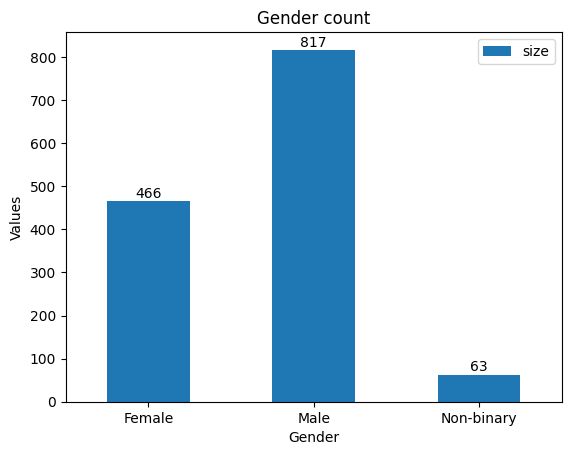

In [8]:
# Plot the bar graph
ax11 = df13.plot(x='Gender', kind='bar', stacked=True)

# Add text annotations to each bar
for index, value in enumerate(df13['size']):
    ax11.text(index, value + 1, str(value), ha='center', va='bottom')
    
# Customize the plot
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Values')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [ ]:
# Question2 Which age group prefers energy drinks more?

In [9]:
df21 = df3.loc[:,['Consume_frequency','Age']].groupby('Consume_frequency').get_group('Daily')
df22 = df21.groupby('Age', as_index=False).size().rename(columns={'size': 'Number of age group prefers energy drinks more'})
df22.to_csv("Dataset\\Number_of_age_group_prefers_energy_drinks_more.csv", index=False)
df22

,Age,Number of age group prefers energy drinks more
0,15-18,196
1,19-30,736
2,31-45,348
3,46-65,42
4,65+,24


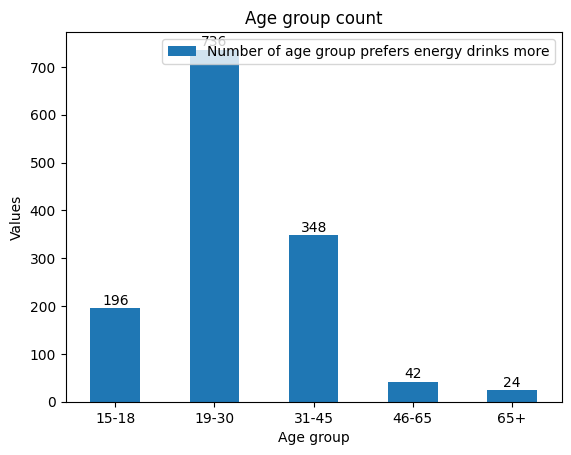

In [9]:
ax21 = df22.plot(x='Age', kind='bar', stacked=True)

# Add text annotations to each bar
for index, value in enumerate(df22['Number of age group prefers energy drinks more']):
    ax21.text(index, value + 1, str(value), ha='center', va='bottom')
    
# Customize the plot
plt.title('Age group count')
plt.xlabel('Age group')
plt.ylabel('Values')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [66]:
#Question3 : Which type of marketing reaches the most Youth (15-30)?

In [10]:
df31 = df3.loc[:,['Marketing_channels','Age']].groupby('Age').get_group('15-18')
df32 = df31.groupby('Marketing_channels', as_index=False).size()
df33 = df3.loc[:,['Marketing_channels','Age']].groupby('Age').get_group('19-30')
df34 = df33.groupby('Marketing_channels', as_index=False).size()
# Concatenate the two DataFrames
df35 = pd.concat([df32, df34]).groupby('Marketing_channels', as_index=False)['size'].sum().rename(columns={'size': 'Total Number of Youth (15-30)'})
df35.to_csv("Dataset\\Which_type_of_marketing_reaches_the_most_Youth_(15-30).csv", index=False)
df35

,Marketing_channels,Total Number of Youth (15-30)
0,Online ads,3373
1,Other,702
2,Outdoor billboards,702
3,Print media,446
4,TV commercials,1785


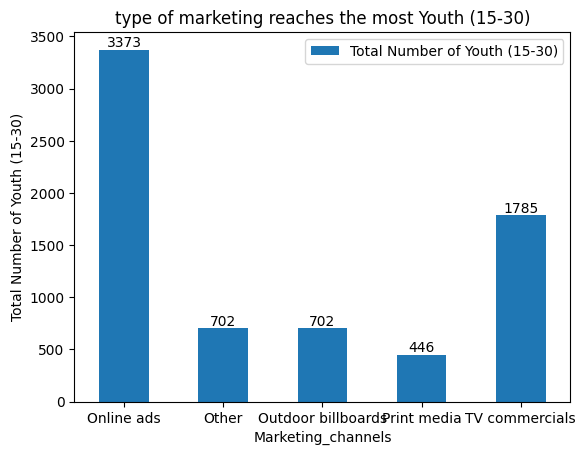

In [37]:
ax31= df35.plot(x='Marketing_channels', kind='bar', stacked=True)

# Add text annotations to each bar
for index, value in enumerate(df35['Total Number of Youth (15-30)']):
    ax31.text(index, value + 1, str(value), ha='center', va='bottom')
    
# Customize the plot
plt.title('type of marketing reaches the most Youth (15-30)')
plt.xlabel('Marketing_channels')
plt.ylabel('Total Number of Youth (15-30)')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [125]:
# Question 4: What are the preferred ingredients of energy drinks among respondents?

In [11]:
df41 = df3.loc[:,['Consume_reason','Ingredients_expected']].groupby('Consume_reason').get_group('Increased energy and focus')
df41

,Consume_reason,Ingredients_expected
0,Increased energy and focus,Guarana
2,Increased energy and focus,Caffeine
4,Increased energy and focus,Caffeine
6,Increased energy and focus,Guarana
14,Increased energy and focus,Sugar
...,...,...
9986,Increased energy and focus,Caffeine
9990,Increased energy and focus,Sugar
9994,Increased energy and focus,Caffeine
9997,Increased energy and focus,Caffeine


In [12]:
df42 = df41.groupby('Ingredients_expected', as_index=False).size().rename(columns={'size': 'Prefferred ingredient of energy drinks among respondents'})
df42.to_csv("Dataset\\Prefferred_ingredient_of_energy_drinks_among_respondents.csv", index=False)
df42

,Ingredients_expected,Prefferred ingredient of energy drinks among respondents
0,Caffeine,1451
1,Guarana,531
2,Sugar,703
3,Vitamins,889


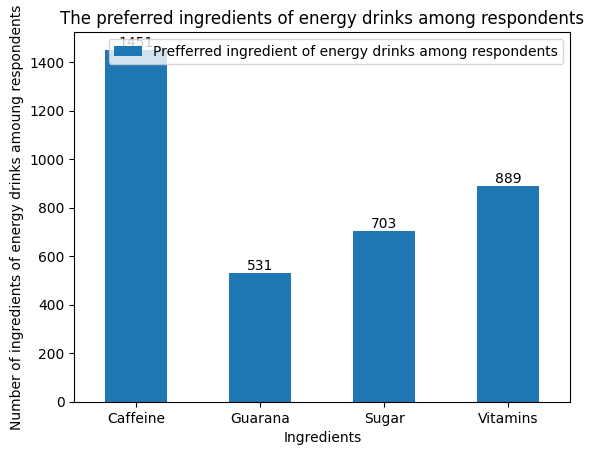

In [14]:
ax41= df42.plot(x='Ingredients_expected', kind='bar', stacked=True)

# Add text annotations to each bar
for index, value in enumerate(df42['Prefferred ingredient of energy drinks among respondents']):
    ax41.text(index, value + 1, str(value), ha='center', va='bottom')
    
# Customize the plot
plt.title('The preferred ingredients of energy drinks among respondents')
plt.xlabel('Ingredients')
plt.ylabel('Number of ingredients of energy drinks amoung respondents')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [2]:
# Question 5. What packaging preferences do respondents have for energy drinks?

In [13]:
df51 = df3.loc[:,['Consume_reason','Packaging_preference']].groupby('Consume_reason').get_group('Increased energy and focus')
df51

,Consume_reason,Packaging_preference
0,Increased energy and focus,Compact and portable cans
2,Increased energy and focus,Innovative bottle design
4,Increased energy and focus,Compact and portable cans
6,Increased energy and focus,Innovative bottle design
14,Increased energy and focus,Compact and portable cans
...,...,...
9986,Increased energy and focus,Compact and portable cans
9990,Increased energy and focus,Collectible packaging
9994,Increased energy and focus,Compact and portable cans
9997,Increased energy and focus,Compact and portable cans


In [14]:
df52 = df51.groupby('Packaging_preference', as_index=False).size()
df52.to_csv("Dataset\\What_packaging_preferences_do_respondents_have_for_energy_drinks.csv", index=False)
df52

,Packaging_preference,size
0,Collectible packaging,541
1,Compact and portable cans,1446
2,Eco-friendly design,348
3,Innovative bottle design,1076
4,Other,163


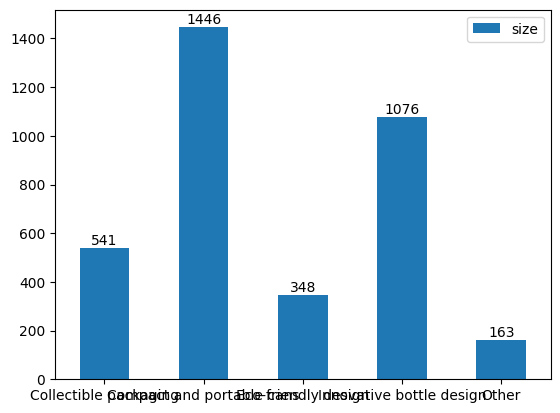

In [15]:
ax51= df52.plot(x='Packaging_preference', kind='bar', stacked=True)

# Add text annotations to each bar
for index, value in enumerate(df52['size']):
    ax51.text(index, value + 1, str(value), ha='center', va='bottom')
    
# Customize the plot
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [ ]:
# Q6 : Who are the current market leaders?

In [16]:
df61 = df3.loc[:,['Current_brands']].groupby('Current_brands', as_index=False).size()
df61.to_csv("Dataset\\Who_are_the_current_market_leaders.csv", index=False)
df61

,Current_brands,size
0,Bepsi,2112
1,Blue Bull,1058
2,CodeX,980
3,Cola-Coka,2538
4,Gangster,1854
5,Others,479
6,Sky 9,979


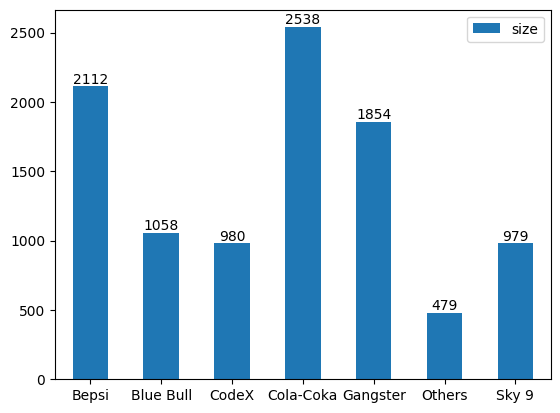

In [17]:
ax61= df61.plot(x='Current_brands', kind='bar', stacked=True)

# Add text annotations to each bar
for index, value in enumerate(df61['size']):
    ax61.text(index, value + 1, str(value), ha='center', va='bottom')
    
# Customize the plot
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [ ]:
# Q7: What are the primary reasons consumers prefer those brands over ours?

In [21]:
df71 = df3.loc[:,['Current_brands', 'Reasons_for_choosing_brands']]
df71

,Current_brands,Reasons_for_choosing_brands
0,Blue Bull,Availability
1,Bepsi,Availability
2,Bepsi,Availability
3,Bepsi,Other
4,Sky 9,Other
...,...,...
9995,Cola-Coka,Brand reputation
9996,Gangster,Effectiveness
9997,Blue Bull,Availability
9998,Blue Bull,Taste/flavor preference


In [20]:
df72 = df71.groupby('Current_brands').get_group('Blue Bull').groupby('Reasons_for_choosing_brands', as_index=False).size().rename(columns={'size': 'Blue Bull'})
df72

NameError: name 'df71' is not defined

In [23]:
df73 = df71.groupby('Current_brands').get_group('Bepsi').groupby('Reasons_for_choosing_brands', as_index=False).size().rename(columns={'size': 'Bepsi'})
df73

,Reasons_for_choosing_brands,Bepsi
0,Availability,418
1,Brand reputation,577
2,Effectiveness,339
3,Other,355
4,Taste/flavor preference,423


In [19]:
df74 = df71.groupby('Current_brands').get_group('Sky 9').groupby('Reasons_for_choosing_brands', as_index=False).size().rename(columns={'size': 'Sky 9'})
df74

NameError: name 'df71' is not defined

In [25]:
df75 = df71.groupby('Current_brands').get_group('Cola-Coka').groupby('Reasons_for_choosing_brands', as_index=False).size().rename(columns={'size': 'Cola-Coka'})
df75

,Reasons_for_choosing_brands,Cola-Coka
0,Availability,510
1,Brand reputation,616
2,Effectiveness,433
3,Other,448
4,Taste/flavor preference,531


In [26]:
df76 = df71.groupby('Current_brands').get_group('Gangster').groupby('Reasons_for_choosing_brands', as_index=False).size().rename(columns={'size': 'Gangster'})
df76

,Reasons_for_choosing_brands,Gangster
0,Availability,339
1,Brand reputation,511
2,Effectiveness,338
3,Other,309
4,Taste/flavor preference,357


In [27]:
df77 = df71.groupby('Current_brands').get_group('CodeX').groupby('Reasons_for_choosing_brands', as_index=False).size().rename(columns={'size': 'CodeX'})
df77

,Reasons_for_choosing_brands,CodeX
0,Availability,195
1,Brand reputation,259
2,Effectiveness,176
3,Other,168
4,Taste/flavor preference,182


In [28]:
df78 = df71.groupby('Current_brands').get_group('Others').groupby('Reasons_for_choosing_brands', as_index=False).size().rename(columns={'size': 'Others'})
df78

,Reasons_for_choosing_brands,Others
0,Availability,86
1,Brand reputation,140
2,Effectiveness,87
3,Other,79
4,Taste/flavor preference,87


In [41]:
df79 = pd.merge(df72,df73,on="Reasons_for_choosing_brands")
df710 = pd.merge(df79,df74,on="Reasons_for_choosing_brands")
df711 = pd.merge(df710,df75,on="Reasons_for_choosing_brands")
df712 = pd.merge(df711,df76,on="Reasons_for_choosing_brands")
df713 = pd.merge(df712,df77,on="Reasons_for_choosing_brands")
df714 = pd.merge(df713,df78,on="Reasons_for_choosing_brands")
df714

,Reasons_for_choosing_brands,Blue Bull,Bepsi,Sky 9,Cola-Coka,Gangster,CodeX,Others
0,Availability,180,418,182,510,339,195,86
1,Brand reputation,289,577,260,616,511,259,140
2,Effectiveness,187,339,188,433,338,176,87
3,Other,165,355,155,448,309,168,79
4,Taste/flavor preference,237,423,194,531,357,182,87


In [ ]:
# Q8 Which marketing channel can be used to reach more customers?

In [4]:
df81 = df3.loc[:,['Marketing_channels']].groupby('Marketing_channels', as_index=False).size()
df81.to_csv("Dataset\\Which marketing channel can be used to reach more customers.csv", index=False)
df81

,Marketing_channels,size
0,Online ads,4020
1,Other,1225
2,Outdoor billboards,1226
3,Print media,841
4,TV commercials,2688


In [8]:
# Q9 How effective are different marketing strategies and channels in reaching our customers?

In [ ]:
# Q10 What do people think about our brand? (overall rating)

In [ ]:
# Q11 Which cities do we need to focus more on? 

In [ ]:
# Q12 Where do respondents prefer to purchase energy drinks?

In [ ]:
# Q13 What are the typical consumption situations for energy drinks among respondents?

In [ ]:
# Q14 What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [ ]:
# Q15 Which area of business should we focus more on our product development? (Branding/taste/availability)